# Fit the data
- New:
    - We take into account the component $B^0 \to D^{*-} K^+ \pi^+ \pi^-$
    - Cut PIDK < 4 for the 3 $\pi$ 

- Fit on $m(B^0_s)$ with:
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$
    - Background $B^0 \to D^{*-} D_s^+$ with simultaneous fit on $m(D_s\to 3\pi)$
    - Background of misidentified pions: $B^0 \to D^{*-} K^+ \pi^+ \pi^-$
    - Background of partially reconstructed decays $B^0 \to D^{*-} \pi^+ \pi^+ \pi^- h$
    - Combinatorial background (exponential)

## Import

In [1]:
import zfit
import json
import numpy as np

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)
import functions as fct
from fit import launch_fit, save_params, plot_hist_fit, plot_hist_fit_particle

Welcome to JupyROOT 6.22/02


## Load

In [2]:
with open(f'{loc.JSON}/MC_cut_params.json', 'r') as f:
    MC_param_results = json.load(f)

In [3]:
df_data_strip = fct.load_data(years, magnets, type_data='data_strip', vars=['B0_M','tau_M', 'BDT'],
                            cut_DeltaM=True, cut_PID=True)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/data_strip.root


In [4]:
df = {}

In [5]:
name_data = 'data_strip_cutDeltaM_PID'

## BDT cut

In [6]:
cut_BDT = -0.2
k = str(cut_BDT)

In [7]:
df[k] = df_data_strip.query(f"BDT > {cut_BDT}")

## Distributions

### Init

In [8]:
# mass of Ds: 1,968 MeV
size_tau_M = 80.
low_tau_M = 1970. - size_tau_M
high_tau_M = 1970. + size_tau_M

In [9]:
n_events_B0_M = {}
d_initial_values = {}
n_Ds = {}
low = 5050.
high = 5550.

### Distribution $m(D_s\to3\pi)$

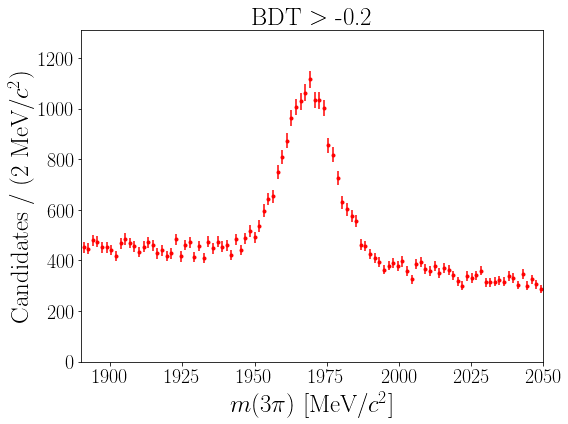

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM_PID/tau_M_data_strip_cutDeltaM_PID_BDT-0.2.pdf


In [10]:
fct.plot_hist_particle({name_data:df[k]},'tau_M',
              low = low_tau_M, high = high_tau_M, cut_BDT=cut_BDT,
              n_bins = 100, mode_hist = False)

In [ ]:
fct.plot_hist_particle({'data_strip_cutDeltaM':df[k]},'B0_M',
              low = low, high = high, cut_BDT=cut_BDT,
              n_bins = 100, mode_hist = False)

## Simultaneous fit on $m(D_s\to3\pi)$ and $m(B^0)$

### Values for the fit $m(D_s\to3\pi)$

In [10]:
d_initial_values_tau = {}
n_events_tau_M = {}

In [11]:
n_events_tau_M[k] = len(df[k].query(f'tau_M > {low_tau_M} and tau_M < {high_tau_M}'))

In [12]:
# n_events_tau_M_v = n_events_tau_M[k]
# d_initial_values_tau[k] = { # it seems that this one works with almost every BDT cut....
#     'mu_tau': {
#         'value' : 1970.,
#         'low': 1960.,
#         'high': 1980.,     
#     },
#     'sigma_tau': {
#         'value' : 10.,
#         'low': 1.,
#         'high': 30.,
#     },
#     'n_bkg_tau': {
#         'value' : n_events_tau_M_v*3/4,
#         'low': 0,
#         'high': n_events_tau_M_v,  
#     },
#     'n_sig_tau': {
#         'value' : n_events_tau_M_v/4,
#         'low': 0,
#         'high': n_events_tau_M_v,  
#     },
#     'lambda_tau': {
#         'value' : -0.0009,
#         'low': -0.01,
#         'high': -0.0001  
#     }
# }


# name                  value    minuit_hesse         minuit_minos    at limit
# ---------------  ----------  --------------  -------------------  ----------
# n_sig_tau|-0.2         9822     +/- 1.7e+02  -1.7e+02   +1.7e+02       False
# n_bkg_tau|-0.2        39500     +/- 2.4e+02  -2.4e+02   +2.4e+02       False
# mu_tau|-0.2            1969     +/-    0.17  -   0.17   +   0.17       False
# sigma_tau|-0.2        9.339     +/-    0.17  -   0.17   +   0.17       False
# lambda_tau|-0.2   -0.002582     +/- 0.00011  -0.00011   +0.00011       False

# n_sig_tau|-0.2         9825     +/- 1.7e+02  -1.7e+02   +1.7e+02       False
# n_bkg_tau|-0.2        39500     +/- 2.4e+02  -2.4e+02   +2.4e+02       False
# mu_tau|-0.2            1969     +/-    0.17  -   0.17   +   0.17       False
# sigma_tau|-0.2         9.34     +/-    0.17  -   0.17   +   0.17       False
# lambda_tau|-0.2   -0.002582     +/- 0.00011  -0.00011   +0.00011       False

# n_sig_tau|-0.2         9823     +/- 1.7e+02  -1.7e+02   +1.7e+02       False
# n_bkg_tau|-0.2        39500     +/- 2.4e+02  -2.5e+02   +2.4e+02       False
# mu_tau|-0.2            1969     +/-    0.17  -   0.17   +   0.17       False
# sigma_tau|-0.2        9.338     +/-    0.17  -   0.17   +   0.18       False
# lambda_tau|-0.2   -0.002582     +/- 0.00011  -0.00011   +0.00011       False

n_events_tau_M_v = n_events_tau_M['-0.2']
d_initial_values_tau['-0.2'] = { # it seems that this one works with almost every BDT cut....
    'mu_tau': {
        'value' : 1969.,
        'low': 1965.,
        'high': 1975.,     
    },
    'sigma_tau': {
        'value' : 9.3,
        'low': 5.,
        'high': 15.,
    },
    'n_bkg_tau': {
        'value' : 39500,
        'low': 0,
        'high': n_events_tau_M_v,  
    },
    'n_sig_tau': {
        'value' : 9800,
        'low': 0,
        'high': n_events_tau_M_v,  
    },
    'lambda_tau': {
        'value' : -0.0026,
        'low': -0.01,
        'high': -0.0001  
    }
}

### Values for the fit $m(B^0)$

In [13]:
n_events_B0_M[k] = len(df[k].query(f'B0_M > {low} and B0_M < {high}'))

n_events_B0_M_k = n_events_B0_M['-0.2']
# name                  value    minuit_hesse         minuit_minos    at limit
# ---------------  ----------  --------------  -------------------  ----------
# n_sig|-0.2           122200     +/- 1.1e+03  -4.9e+02   +1.1e+03       False
# n_bkg|-0.2            92550     +/- 4.2e+03  -4.2e+03   +6.4e+02       False
# n_bkg2|-0.2           35790     +/- 3.2e+03  -3.2e+03   +3.2e+03       False
# mu|-0.2                5279     +/-   0.081  -  0.081   +  0.081       False
# sigma|-0.2            17.84     +/-    0.14  -  0.069   +   0.14       False
# lambda|-0.2      -0.0009923     +/- 0.00026  -0.00091   +0.00091       False
# mu2|-0.2               5052     +/-     1.4  -    1.4   +      3       False
# sigma2|-0.2           62.15     +/-     2.2  -    1.9   +    2.2       False

# n_sig_k = 108000.
# n_bkg_k = 86800.
# n_bkg2_k = 35000.
# n_sig_k = 122000
# n_bkg_k = 92000
# n_bkg2_k = 36000

# d_initial_values['-0.2']= {
#     'mu'       :{ 'value': MC_param_results['mu_MC']    , 'low': MC_param_results['mu_MC']-3. , 'high': MC_param_results['mu_MC']+3., 'floating': True},
#     'sigma'    :{ 'value': 18.                          , 'low': 17.-2.                       , 'high': 17.+2.                      , 'floating': True},
#     'alphaL'   :{ 'value': MC_param_results['alphaL_MC'], 'low': 0.1                          , 'high': 5.                          , 'floating': False},
#     'alphaR'   :{ 'value': MC_param_results['alphaR_MC'], 'low': 0.1                          , 'high': 15.                         , 'floating': True},
#     'nL'       :{ 'value': MC_param_results['nL_MC']    , 'low': 0.1                          , 'high': 5.                          , 'floating': False},
#     'nR'       :{ 'value': MC_param_results['nR_MC']    , 'low': 0.1                          , 'high': 5.                          , 'floating': True},
#     'n_sig'    :{ 'value': n_sig_k                      , 'low': n_sig_k*0.2                  , 'high': n_events_B0_M_k*2/3         , 'floating': True},
#     'lambda'   :{ 'value': -0.001                       , 'low': -0.008                       , 'high': -0.00008                    , 'floating': True},
#     'n_bkg'    :{ 'value': n_bkg_k                      , 'low': n_bkg_k*0.2                  , 'high': n_events_B0_M_k             , 'floating': True},
#     'mu2'      :{ 'value': 5055.                        , 'low': 5040.                        , 'high': 5070.                       , 'floating': True},
#     'sigma2'   :{ 'value': 64.                          , 'low': 55.                          , 'high': 69.                         , 'floating': True},
#     'n_bkg2'   :{ 'value': n_bkg2_k                     , 'low': n_bkg2_k*0.2                 , 'high': n_events_B0_M_k/4           , 'floating': True},
# }


# n_sig|-0.2           125100     +/-   1e+03  -  1e+03   +  1e+03       False
# n_bkg|-0.2            89330     +/- 1.7e+03  -1.7e+03   +1.7e+03       False
# n_bkg2|-0.2           36160     +/- 8.7e+02  -8.7e+02   +8.7e+02       False
# mu|-0.2                5279     +/-   0.068  -  0.069   +  0.068       False
# alphaR|-0.2           2.842     +/-    0.17  -   0.17   +   0.17       False
# nR|-0.2               5.604     +/-    0.69  -   0.69   +   0.92       False
# sigma|-0.2            17.81     +/-   0.073  -  0.073   +  0.073       False
# lambda|-0.2      -0.0007698     +/- 9.8e-05  -9.8e-05   +9.8e-05       False
# mu2|-0.2               5058     +/-     1.7  -    2.8   +    1.7       False
# sigma2|-0.2           56.94     +/-     1.2  -    1.2   +    1.2       False

# n_sig_k = 125000
# n_bkg_k = 89000
# n_bkg2_k = 36000

# d_initial_values['-0.2']= {
#     'mu'       :{ 'value': 5279.                        , 'low': 5279.-2.                     , 'high': 5279.+3.                    , 'floating': True},
#     'sigma'    :{ 'value': 17.                          , 'low': 17.-2.                       , 'high': 17.+2.                      , 'floating': True},
#     'alphaL'   :{ 'value': MC_param_results['alphaL_MC'], 'low': 0.1                          , 'high': 5.                          , 'floating': True},
#     'alphaR'   :{ 'value': 2.8                          , 'low': 1.                           , 'high': 15.                         , 'floating': True},
#     'nL'       :{ 'value': MC_param_results['nL_MC']    , 'low': 0.1                          , 'high': 5.                          , 'floating': True},
#     'nR'       :{ 'value': 5.6                          , 'low': 1.                           , 'high': 15.                         , 'floating': True},
#     'n_sig'    :{ 'value': n_sig_k                      , 'low': n_sig_k*0.2                  , 'high': n_events_B0_M_k*2/3         , 'floating': True},
#     'lambda'   :{ 'value': -0.0008                      , 'low': -0.008                       , 'high': -0.00008                    , 'floating': True},
#     'n_bkg'    :{ 'value': n_bkg_k                      , 'low': n_bkg_k*0.2                  , 'high': n_events_B0_M_k             , 'floating': True},
#     'mu2'      :{ 'value': 5055.                        , 'low': 5040.                        , 'high': 5070.                       , 'floating': True},
#     'sigma2'   :{ 'value': 64.                          , 'low': 55.                          , 'high': 69.                         , 'floating': True},
#     'n_bkg2'   :{ 'value': n_bkg2_k                     , 'low': n_bkg2_k*0.2                 , 'high': n_events_B0_M_k/4           , 'floating': True},
# }

# n_sig_k = 124000
# n_bkg_k = 89600
# n_bkg2_k = 37000
# # n_sig|-0.2           123900     +/- 8.1e+02  -8.1e+02   +1.1e+03       False
# # n_bkg|-0.2            89570     +/- 1.5e+03  -1.5e+03   +1.5e+03       False
# # n_bkg2|-0.2           37130     +/- 9.1e+02  -1.1e+03   +9.1e+02       False
# # alphaL|-0.2           1.215     +/-   0.021  -  0.021   +  0.021       False
# # nL|-0.2               1.528     +/-   0.028  -  0.028   +  0.028       False
# # mu|-0.2                5279     +/-   0.077  -  0.083   +  0.077       False
# # alphaR|-0.2            4.21     +/-    0.38  -   0.58   +   0.63       False
# # nR|-0.2                   8     +/-    0.02  -   0.78   +   0.81       False
# # sigma|-0.2             17.5     +/-   0.095  -  0.095   +    0.1       False
# # lambda|-0.2      -0.0007746     +/- 9.1e-05  -9.1e-05   +0.00012       False
# # mu2|-0.2               5056     +/-     2.2  -    2.2   +    2.2       False
# # sigma2|-0.2           59.74     +/-     1.6  -    1.6   +    1.6       False
# # alpha_R negative or zero diagonal element in cov matrix

# d_initial_values['-0.2']= {
#     'mu'       :{ 'value': 5279.                        , 'low': 5279.-2.                     , 'high': 5279.+3.                    , 'floating': True},
#     'sigma'    :{ 'value': 17.5                         , 'low': 17.-2.                       , 'high': 17.+2.                      , 'floating': True},
#     'alphaL'   :{ 'value': 1.2                          , 'low': 0.1                          , 'high': 5.                          , 'floating': True},
#     'alphaR'   :{ 'value': 4.6                          , 'low': 1.                           , 'high': 8.                         , 'floating': True},
#     'nL'       :{ 'value': 1.5                          , 'low': 0.1                          , 'high': 5.                          , 'floating': True},
#     'nR'       :{ 'value': 5.6                          , 'low': 1.                           , 'high': 8.                         , 'floating': True},
#     'n_sig'    :{ 'value': n_sig_k                      , 'low': n_sig_k*0.2                  , 'high': n_events_B0_M_k*2/3         , 'floating': True},
#     'lambda'   :{ 'value': -0.0009                      , 'low': -0.008                       , 'high': -0.00008                    , 'floating': True},
#     'n_bkg'    :{ 'value': n_bkg_k                      , 'low': n_bkg_k*0.2                  , 'high': n_events_B0_M_k             , 'floating': True},
#     'mu2'      :{ 'value': 5055.                        , 'low': 5040.                        , 'high': 5070.                       , 'floating': True},
#     'sigma2'   :{ 'value': 60.                          , 'low': 52.                          , 'high': 69.                         , 'floating': True},
#     'n_bkg2'   :{ 'value': n_bkg2_k                     , 'low': n_bkg2_k*0.2                 , 'high': n_events_B0_M_k/4           , 'floating': True},
# }

n_sig_k = 123500
n_bkg_k = 90400
n_bkg2_k = 36700

# n_sig|-0.2           123500     +/- 6.9e+02  -7.4e+02   +7.1e+02       False
# n_bkg|-0.2            90450     +/- 1.5e+03  -1.6e+03   +1.7e+03       False
# n_bkg2|-0.2           36640     +/- 9.8e+02  -1.1e+03   +1.1e+03       False
# alphaL|-0.2           1.216     +/-   0.016  -  0.017   +  0.017       False
# nL|-0.2                 1.5     +/-   0.026  -  0.027   +  0.028       False
# mu|-0.2                5279     +/-   0.075  -  0.075   +  0.076       False
# sigma|-0.2            17.47     +/-   0.095  -  0.099   +  0.095       False
# lambda|-0.2      -0.0008162     +/- 9.1e-05  - 0.0001   +9.8e-05       False
# mu2|-0.2               5057     +/-     2.4  -    2.6   +    2.5       False
# sigma2|-0.2           59.19     +/-     1.8  -    1.9   +    1.9       False
# alpha_R negative or zero diagonal element in cov matrix

d_initial_values['-0.2'] = {
    'mu'       :{ 'value': 5279.                        , 'low': 5279.-2.                     , 'high': 5279.+3.                    , 'floating': True},
    'sigma'    :{ 'value': 17.5                         , 'low': 17.-2.                       , 'high': 17.+2.                      , 'floating': True},
    'alphaL'   :{ 'value': 1.2                          , 'low': 0.1                          , 'high': 5.                          , 'floating': True},
    'alphaR'   :{ 'value': MC_param_results['alphaR_MC'], 'low': 1.                           , 'high': 8.                          , 'floating': False},
    'nL'       :{ 'value': 1.5                          , 'low': 0.1                          , 'high': 5.                          , 'floating': True},
    'nR'       :{ 'value': MC_param_results['nR_MC']    , 'low': 1.                           , 'high': 15.                         , 'floating': False},
    'n_sig'    :{ 'value': n_sig_k                      , 'low': n_sig_k*0.2                  , 'high': n_events_B0_M_k*2/3         , 'floating': True},
    'lambda'   :{ 'value': -0.0008                      , 'low': -0.008                       , 'high': -0.00008                    , 'floating': True},
    'n_bkg'    :{ 'value': n_bkg_k                      , 'low': n_bkg_k*0.2                  , 'high': n_events_B0_M_k             , 'floating': True},
    'mu2'      :{ 'value': 5057.                        , 'low': 5040.                        , 'high': 5070.                       , 'floating': True},
    'sigma2'   :{ 'value': 60.                          , 'low': 52.                          , 'high': 68.                         , 'floating': True},
    'n_bkg2'   :{ 'value': n_bkg2_k                     , 'low': n_bkg2_k*0.2                 , 'high': n_events_B0_M_k/4           , 'floating': True},
}


In [14]:
print(MC_param_results['alphaR_MC'])

4.248412400833038


## Simultaneous fit

### Observables and variables

In [15]:
obs_tau = zfit.Space("x", limits=(low_tau_M, high_tau_M))
zparams_tau = {}

initial_values_tau = d_initial_values_tau[k]

for var_tau in initial_values_tau.keys():
    zparams_tau[var_tau] = zfit.Parameter(f"{var_tau}|{cut_BDT}", initial_values_tau[var_tau]['value'], 
                                     initial_values_tau[var_tau]['low'], initial_values_tau[var_tau]['high'])

In [16]:
obs = zfit.Space("x", limits=(low, high))
initial_values = d_initial_values[k]
zparams = {}
for var in initial_values.keys():
    zparams[var] = zfit.Parameter(f"{var}|{cut_BDT}",
                                  initial_values[var]['value'], 
                                  initial_values[var]['low'], 
                                  initial_values[var]['high'],
                                  floating = initial_values[var]['floating'])
    #print(zparams[var])

In [17]:
name_params_tau = {
    f'mu_tau|{cut_BDT}':'$\mu_{m_{D_s}}$',
    f'sigma_tau|{cut_BDT}':'$\sigma_{m_{D_s}}$',
    f'n_bkg_tau|{cut_BDT}':'$n_{bkg}$',
    f'n_sig_tau|{cut_BDT}':'$n_{sig,D_s}$',
    f'lambda_tau|{cut_BDT}':'$\\lambda$',
}

name_params = {
    f'mu|{cut_BDT}'      : '$\mu$',
    f'sigma|{cut_BDT}'   : '$\sigma$',
    f'alphaL|{cut_BDT}'  : '$\\alpha_L$',
    f'alphaR|{cut_BDT}'  : '$\\alpha_R$',
    f'nL|{cut_BDT}'      : '$n_L$',
    f'nR|{cut_BDT}'      : '$n_R$',
    f'n_bkg|{cut_BDT}'   : '$n_{bkg}$',
    f'n_sig|{cut_BDT}'   : '$n_{sig}$',
    f'lambda|{cut_BDT}'  : '$\\lambda$',
    f'mu2|{cut_BDT}'     : '$\\mu_2$',
    f'sigma2|{cut_BDT}'  : '$\\sigma_2$',
    f'n_bkg2|{cut_BDT}'  : '$n_{bkg2}$',
}

### PDFs

In [18]:
gaussian_tau = zfit.pdf.Gauss(zparams_tau["mu_tau"],zparams_tau["sigma_tau"],obs=obs_tau)
exponential_tau = zfit.pdf.Exponential(zparams_tau["lambda_tau"], obs=obs_tau)

gaussian_ext_tau = gaussian_tau.create_extended(zparams_tau["n_sig_tau"])
exp_ext_tau = exponential_tau.create_extended(zparams_tau["n_bkg_tau"])
model_tau = zfit.pdf.SumPDF([gaussian_ext_tau, exp_ext_tau]) # gauss is folded by frac

data_tau = zfit.Data.from_pandas(df[k]['tau_M'],obs=obs_tau)

In [19]:
doubleCB = zfit.pdf.DoubleCB(zparams['mu'], zparams['sigma'],
                             zparams['alphaL'], zparams['alphaR'],
                             zparams['nL'], zparams['nR'], 
                             obs=obs)

exponential = zfit.pdf.Exponential(zparams['lambda'], obs=obs)
gaussian = zfit.pdf.Gauss(zparams['mu2'],zparams['sigma2'],obs=obs)

doubleCB_Ds = zfit.pdf.DoubleCB(zparams['mu'], zparams['sigma'], 
                                zparams['alphaL'], zparams['alphaR'], 
                                zparams['nL'], zparams['nR'], 
                                obs=obs)

# sum of the two PDFs
doubleCB_ext = doubleCB.create_extended(zparams['n_sig'])
exp_ext = exponential.create_extended(zparams['n_bkg'])
gaussian_ext = gaussian.create_extended(zparams['n_bkg2'])
doubleCB_Ds_ext = doubleCB_Ds.create_extended(zparams_tau['n_sig_tau'])

model = zfit.pdf.SumPDF([doubleCB_ext, exp_ext,gaussian_ext,doubleCB_Ds_ext]) # gauss is folded by frac
data = zfit.Data.from_pandas(df[k]['B0_M'], obs=obs)

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:391: UserWarning: The function <function Space.limits at 0x7f9bb62ed4d0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:35: UserWarning: The function <function Space.area at 0x7f9bb62f38c0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins
findfont: Font family ['serif'] not found. Falling back to Dej

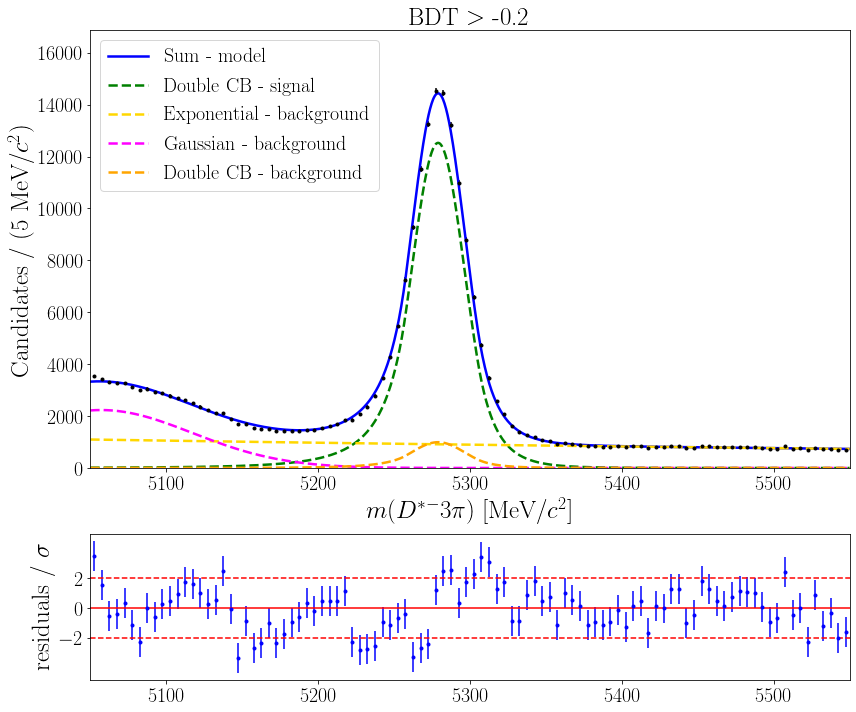

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM_test/B0_M_data_strip_cutDeltaM_test_fit_BDT-0.2.pdf


In [20]:
# name                  value    minuit_hesse         minuit_minos    at limit
# ---------------  ----------  --------------  -------------------  ----------
# n_sig|-0.2           125100     +/- 7.1e+02  -7.1e+02   +7.9e+02       False
# n_bkg|-0.2            86790     +/- 1.6e+03  -1.8e+03   +1.6e+03       False
# n_bkg2|-0.2           38740     +/- 1.1e+03  -1.1e+03   +1.2e+03       False
# alphaL|-0.2           1.204     +/-   0.015  -  0.016   +  0.017       False
# nL|-0.2               1.595     +/-   0.026  -  0.028   +  0.026       False
# mu|-0.2                5280     +/-   0.076  -  0.076   +  0.076       False
# sigma|-0.2            17.57     +/-   0.091  -  0.093   +  0.091       False
# lambda|-0.2      -0.0006425     +/- 9.9e-05  -9.9e-05   +0.00012       False
# mu2|-0.2               5055     +/-     3.1  -    3.1   +    3.1       False
# sigma2|-0.2           61.78     +/-     2.3  -    1.9   +    2.2       False
#zparams['sigma2'].set_value(61.78)

# n_sig_k = 108000.
# n_bkg_k = 86800.
# n_bkg2_k = 35000.

# zparams['n_sig'].set_value(n_sig_k)
# zparams['n_bkg'].set_value(n_bkg_k)
# zparams['n_bkg2'].set_value(n_bkg2_k)

# zparams['lambda'].set_value(-0.0009)

plot_hist_fit_particle(df[k],'B0_M', models = [model,doubleCB_ext,exp_ext,gaussian_ext, doubleCB_Ds_ext], 
              obs=obs, n_bins = 100,mode_hist = False,
              name_data = 'data strip cutDeltaM_test',cut_BDT=cut_BDT)

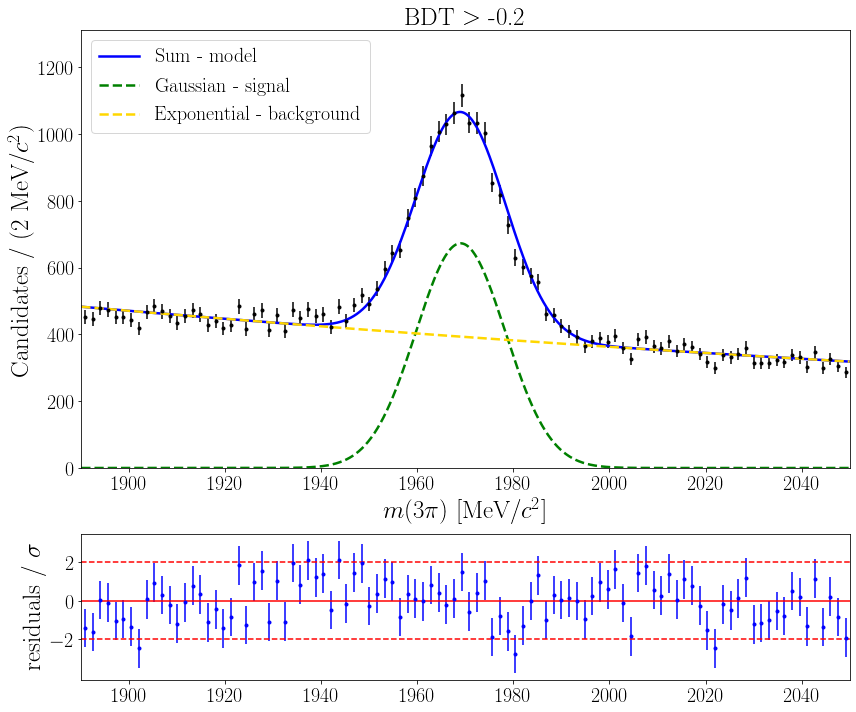

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM_test/tau_M_data_strip_cutDeltaM_test_fit_BDT-0.2.pdf


In [22]:
plot_hist_fit_particle(df[k],'tau_M', models = [model_tau,gaussian_ext_tau,exp_ext_tau], 
              obs=obs_tau, n_bins = 100,mode_hist = False,
              name_data = 'data strip cutDeltaM_test',cut_BDT=cut_BDT)

### Fitting

In [30]:
result, params = launch_fit([model_tau, model], [data_tau, data], extended=True)

------------------------------------------------------------------
| FCN = -1.727e+06              |     Ncalls=275 (275 total)     |
| EDM = 0.0024 (Goal: 0.001)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name                  value    minuit_hesse         minuit_minos    at limit
---------------  ----------  --------------  -------------------  ----------
n_sig_tau|-0.2         9823     +/- 1.7e+0

Info: VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
Info in Edm is smaller than machine accuracy : machineLimit = 0.102944
Info in Current  Edm is : edm = 0.00239676
Info in Required Edm is : edmval = 0.001


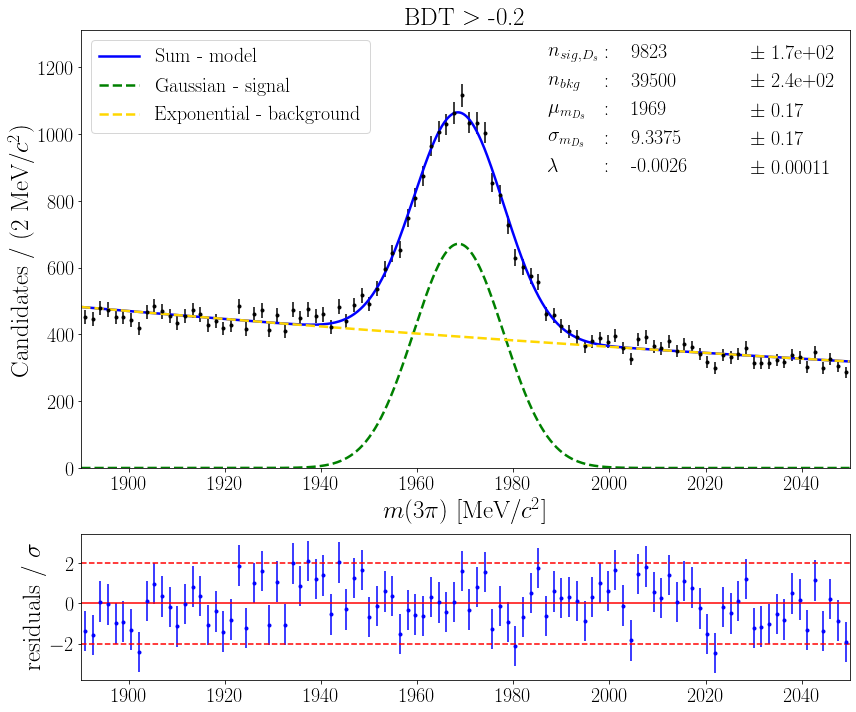

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM_PID/tau_M_data_strip_cutDeltaM_PID_fit_BDT-0.2.pdf


In [33]:
plot_hist_fit_particle(df[k],'tau_M',models = [model_tau,gaussian_ext_tau,exp_ext_tau], 
                       #name_models = [None, '$D_S \\to 3\pi$','(combinatorial)'],
              obs=obs_tau, n_bins = 100,mode_hist = False, name_data=name_data, cut_BDT=cut_BDT,
              params=params, name_params=name_params_tau)

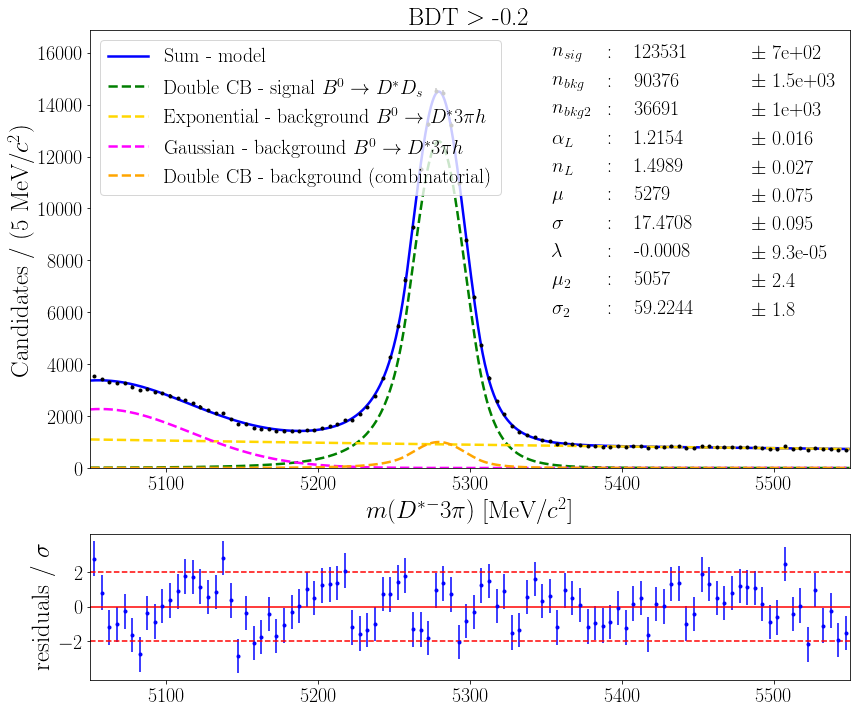

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM_PID/B0_M_data_strip_cutDeltaM_PID_fit_BDT-0.2.pdf


In [32]:
plot_hist_fit_particle(df[k],'B0_M', models = [model,doubleCB_ext,exp_ext,gaussian_ext, doubleCB_Ds_ext],
                       name_models = [None, '$B^0\\to D^*D_s$','$B^0\\to D^*3\pi h$','$B^0\\to D^*3\pi h$', '(combinatorial)'],
                       obs=obs, n_bins = 100,mode_hist = False,
                       name_data = name_data,cut_BDT=cut_BDT,
                       params=params,name_params=name_params)

In [26]:
save_params(params,f'cut_PID_BDT{cut_BDT}',True)

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/cut_PID_BDT-0.2_params.json
